In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8,5

In [5]:
student_df = pd.read_csv('../data/student_math_preprocessed.csv')
student_df.head(10)

,age,medu,fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,fjob_services,fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,useAlc
0,18,4,4,2,2,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,2
1,17,1,1,1,2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,2
2,15,1,1,1,2,3,1,0,1,0,...,0,0,0,0,1,0,0,1,0,5
3,15,4,2,1,3,0,0,1,1,1,...,1,0,0,1,0,0,0,1,0,2
4,16,3,3,1,2,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,3
5,16,4,3,1,2,0,0,1,1,1,...,0,0,0,0,0,1,0,1,0,3
6,16,2,2,1,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
7,17,4,4,2,2,0,1,1,0,0,...,0,1,0,1,0,0,0,1,0,2
8,15,3,2,1,2,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,2
9,15,3,4,1,2,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,2


Покажем наглядно на графиках, где находятся аномалии

<ipython-input-6-adf392fcf3f0>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  student_df.hist(ax = fig.gca())


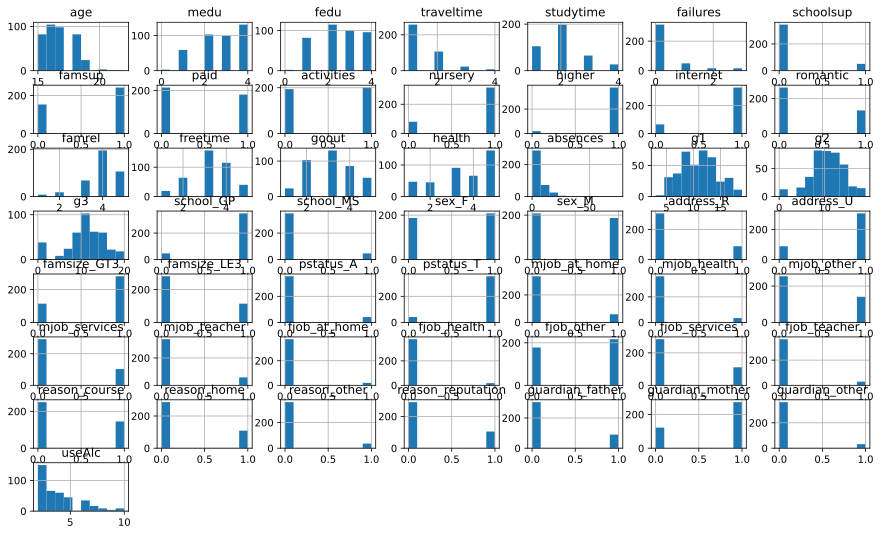

In [6]:
fig = plt.figure(figsize=(15,9))
student_df.hist(ax = fig.gca())
plt.show()

 С помощью боксплотов более наглядно посмотрим, в каждом признаке с каких значений появляются аномалии.

{'whiskers': [<matplotlib.lines.Line2D at 0x2bac7fe5370>,
 'caps': [<matplotlib.lines.Line2D at 0x2bac7fe5a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bac800dfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bac8026160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bac80264c0>],
 'means': []}

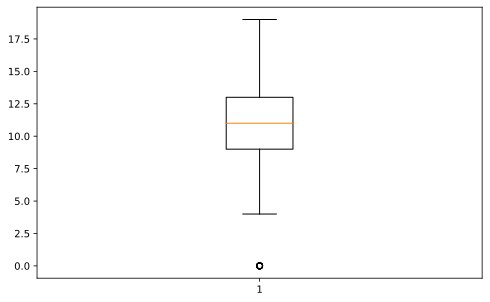

In [7]:
plt.boxplot(student_df.g2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bac8088280>,
 'caps': [<matplotlib.lines.Line2D at 0x2bac8088940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bac8079ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bac8093040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bac80933a0>],
 'means': []}

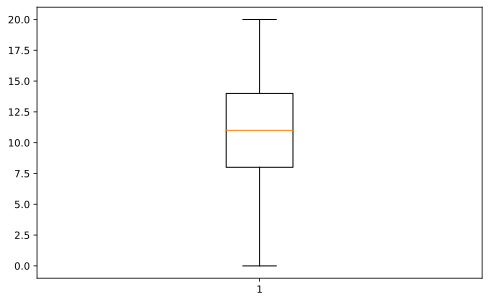

In [8]:
plt.boxplot(student_df.g3)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bac80e95e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bac80e9cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bac80e9280>],
 'medians': [<matplotlib.lines.Line2D at 0x2bac80f43d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bac80f4730>],
 'means': []}

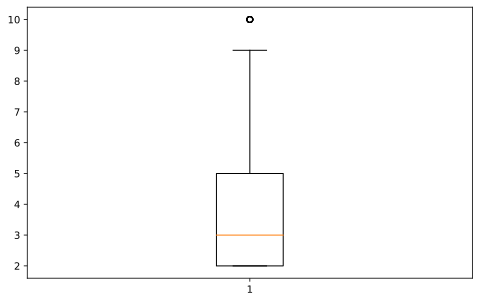

In [9]:
plt.boxplot(student_df.useAlc)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bac79d5460>,
 'caps': [<matplotlib.lines.Line2D at 0x2bac7a734f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bac7752fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bac7ece6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bac77755b0>],
 'means': []}

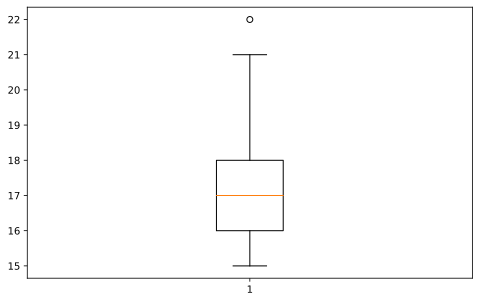

In [10]:
plt.boxplot(student_df.age)

In [11]:
student_df = student_df.drop(student_df[student_df.g2<2.5].index)
student_df = student_df.drop(student_df[student_df.g3<2.5].index)
student_df = student_df.drop(student_df[student_df.useAlc > 9].index)
student_df = student_df.drop(student_df[student_df.age > 18].index)

 Проверим, как теперь выглядят гистограммы.

<ipython-input-12-adf392fcf3f0>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  student_df.hist(ax = fig.gca())


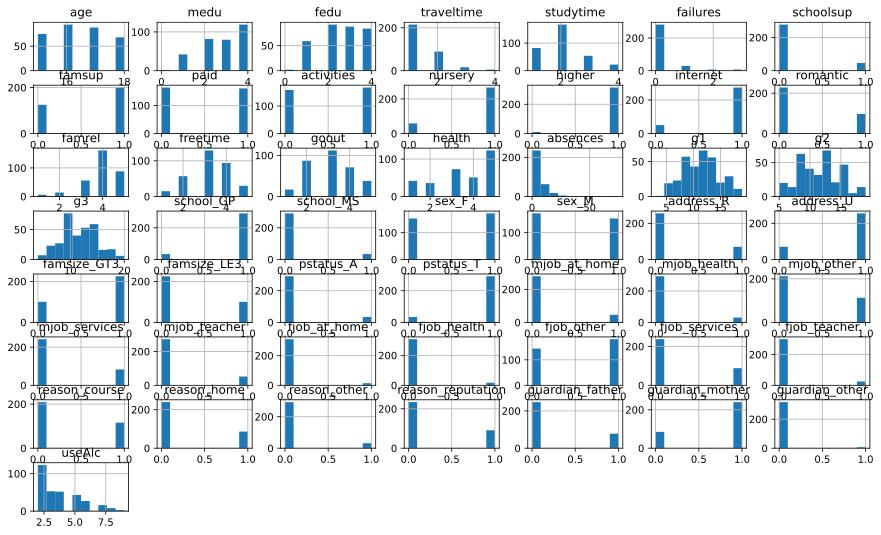

In [12]:
fig = plt.figure(figsize=(15,9))
student_df.hist(ax = fig.gca())
plt.show()

# Алгоритмы

Разобьем данные на тренировочную и тестовую выборки.

In [13]:
student_df["useAlc"].unique()

array([2, 5, 3, 4, 6, 7, 8, 9], dtype=int64)

In [14]:
x = student_df.iloc[:,:-1].values
y = student_df.iloc[:,49].values

In [15]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels  = model_selection.train_test_split(x, y,  test_size = 0.3, random_state=0)

In [16]:
print('Размер обучающей выборки: {} объектов \nРазмер тестовой выборки: {} объектов'.format(len(train_data),
                                                                                            len(test_data)))

Размер обучающей выборки: 227 объектов 
Размер тестовой выборки: 98 объектов


## Регрессия дерева решений

https://habr.com/ru/company/mailru/blog/513842/

In [17]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [18]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(train_data, train_labels)
y_pred = regressor.predict(test_data)

In [19]:
metric1 = metrics.mean_absolute_error(test_labels, y_pred)
metric2 = metrics.mean_squared_error(test_labels, y_pred)
metric3 = sqrt(metrics.mean_squared_error(test_labels, y_pred))
metric4 = metrics.r2_score(test_labels, y_pred)

In [22]:
print('R2: ', metric4)
print('Mean Square Error(MSE): ', metric2)
print('Root Mean Square Error(RMSE): ', metric3)
print('mean absolute error (MAE)', metric1)

R2:  0.18734879032258056
Mean Square Error(MSE):  2.0565051020408167
Root Mean Square Error(RMSE):  1.4340519872169268
mean absolute error (MAE) 1.1831632653061224


## Линейная регрессия

https://d3c33hcgiwev3.cloudfront.net/SL3Lo-nTEemrnwondA39mg_c9d0739067f34b6c8e7162b1def5022f_sklearn.linear_model_part2.html?Expires=1615248000&Signature=fKq~LG0Mg6WzsXokScZG~38ebKxJk5r2UEXC3PIMZabFTpmfNgz560mFm5RBwX1ESxRVGH7eCekuCwWpLdA7UTd4g1YF97v0223cqnspWICv~PQeqXK87P7VzShZ5AwEw88WKSuO~9NduuvifmXHI9C0~hapOl4lDCIzmkutvx8_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A

In [23]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [24]:
print(test_labels)

[2 4 3 5 7 4 7 6 5 3 2 2 4 4 2 2 2 2 2 5 3 2 2 3 2 3 3 5 7 2 5 2 2 2 3 2 4
 2 2 2 3 4 2 4 2 2 7 2 3 5 2 5 2 3 3 4 2 3 4 5 5 4 6 2 4 2 3 2 5 5 6 4 6 2
 3 2 6 2 2 2 4 5 5 3 7 3 6 2 2 2 2 3 3 2 2 2 4 8]


In [25]:
print(predictions)

[3.00616979 3.55587792 3.59728538 2.45962693 4.47124132 3.28255854
 6.64980869 4.44444024 3.48186673 3.13828326 2.10971182 2.56601543
 4.96565034 4.41933219 2.90009659 2.91109321 4.42609501 4.76118397
 1.41764049 2.83545474 0.92445446 2.73056962 3.37564522 3.64920946
 3.65315156 3.79784509 4.23225256 1.67577074 3.41619938 4.14140918
 3.84062258 3.07654292 2.91507217 4.60440106 6.21490642 2.62373015
 2.7401666  3.03405099 4.00099624 3.067778   3.57652997 4.43731896
 1.08986839 2.14285027 2.86443946 2.9462802  5.62367678 1.87819029
 3.00501962 4.45667748 2.15503078 5.34847618 3.89313577 4.18317191
 2.16360395 4.31394975 4.12873869 3.3602971  5.04781882 2.61756973
 4.52098313 3.47956818 4.63600237 2.76378856 5.25654158 3.17478977
 3.54465065 2.79887199 5.95857426 4.17150588 4.20334612 4.57744706
 3.63607654 3.21218521 3.18824724 4.39163562 4.95952885 2.86443495
 2.93661059 1.61103771 3.03347992 4.65747681 5.09446164 3.53016574
 5.96426011 2.30892955 5.44239303 3.07242406 3.9177111  2.1360

 Посчитаем среднее отклонение приближения от исходного значения функции

In [26]:
metrics.mean_absolute_error(test_labels, predictions)

1.1370365139892937

 Сделаем оценку чуть более точной и для этого воспользуемся функцией cross_val_score.

In [27]:
 scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [28]:
linear_scoring = model_selection.cross_val_score(linear_regressor, x, y, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 1.237353317445919, std: 0.1845412024779767


 Воспользуемся всеми метриками

In [29]:
print('R2: ', metric4)
print('Mean Square Error(MSE): ', metric2)
print('Root Mean Square Error(RMSE): ', metric3)
print('mean absolute error (MAE)', metric1)

R2:  0.18734879032258056
Mean Square Error(MSE):  2.0565051020408167
Root Mean Square Error(RMSE):  1.4340519872169268
mean absolute error (MAE) 1.1831632653061224


## Lasso

https://habr.com/ru/company/mailru/blog/513842/

In [30]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [31]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, x, y, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 1.4771251371068566, std: 0.16863861350215198


In [32]:
metric1 = metrics.mean_absolute_error(test_labels, lasso_predictions)
metric2 = metrics.mean_squared_error(test_labels, lasso_predictions)
metric3 = sqrt(metrics.mean_squared_error(test_labels, lasso_predictions))
metric4 = metrics.r2_score(test_labels, lasso_predictions)

In [33]:
print('R2: ', metric4)
print('Mean Square Error(MSE): ', metric2)
print('Root Mean Square Error(RMSE): ', metric3)
print('mean absolute error (MAE)', metric1)

1.4082711886290034 2.624882535752043 1.6201489239425007 -0.03725196977298473


## Гребневая регрессия

https://habr.com/ru/company/mailru/blog/513842/

In [34]:
from sklearn.linear_model import RidgeCV

ridge_reg = linear_model.Ridge()
ridge_reg.fit(train_data, train_labels)
y_pred = ridge_reg.predict(test_data)

In [35]:
metric1 = metrics.mean_absolute_error(test_labels, y_pred)
metric2 = metrics.mean_squared_error(test_labels, y_pred)
metric3 = sqrt(metrics.mean_squared_error(test_labels, y_pred))
metric4 = metrics.r2_score(test_labels, y_pred)

In [36]:
print('R2: ', metric4)
print('Mean Square Error(MSE): ', metric2)
print('Root Mean Square Error(RMSE): ', metric3)
print('mean absolute error (MAE)', metric1)

1.1292963806985126 1.9097127643812264 1.3819235740015532 0.24535543988161224


## Elastic Net

https://habr.com/ru/company/mailru/blog/513842/

In [37]:
from sklearn.linear_model import ElasticNetCV

model_en = linear_model.ElasticNetCV()
model_en.fit(train_data, train_labels)
y_pred = model_en.predict(test_data)

In [38]:
metric1 = metrics.mean_absolute_error(test_labels, y_pred)
metric2 = metrics.mean_squared_error(test_labels, y_pred)
metric3 = sqrt(metrics.mean_squared_error(test_labels, y_pred))
metric4 = metrics.r2_score(test_labels, y_pred)

In [39]:
print('R2: ', metric4)
print('Mean Square Error(MSE): ', metric2)
print('Root Mean Square Error(RMSE): ', metric3)
print('mean absolute error (MAE)', metric1)

1.1625974842805904 2.0054621782582847 1.416143417263338 0.207518977946323


# Подбор гиперпараметров

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
tree_model = tree.DecisionTreeRegressor()
parameters = {'criterion': ['mse','friedman_mse','mae','poisson'],
              'max_depth': range(1,13,4),
              'min_samples_leaf': range (1,8,4),
              'min_samples_split': range(2,10,4)}
tree_model = GridSearchCV(tree_model, parameters,cv = 5)
tree_model.fit(train_data, train_labels)
print(tree_model.best_estimator_)

DecisionTreeRegressor(max_depth=1)


In [42]:
lin_reg_plus = linear_model.Lasso()
parameters = {
              'selection' : ['cylic','random'],
              'max_iter' : range(1000, 10000, 1000)
            }
lin_reg_plus = GridSearchCV(lin_reg_plus, parameters,cv = 5)
lin_reg_plus.fit(train_data, train_labels)
print(lin_reg_plus.best_estimator_)

C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 825, in fit
    raise ValueError("selection should be either random or cyclic.")
ValueError: selection should be either random or cyclic.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

Lasso(max_iter=9000, selection='random')


C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 825, in fit
    raise ValueError("selection should be either random or cyclic.")
ValueError: selection should be either random or cyclic.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

In [43]:
lin_model = linear_model.Ridge()
parameters = {
              'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
            }
lin_model = GridSearchCV(lin_model, parameters,cv = 5)
lin_model.fit(train_data, train_labels)
print(lin_model.best_estimator_)

Ridge(solver='saga')


In [44]:
lin_model = linear_model.ElasticNet()
parameters = {
              'selection' : ['cyclic','random'],
              'max_iter': range(1000,10000,100)
            }
lin_model = GridSearchCV(lin_model, parameters,cv = 5)
lin_model.fit(train_data, train_labels)
print(lin_model.best_estimator_)

ElasticNet(max_iter=7700, selection='random')
